17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,713 (5.39 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 125s 779ms/step - accuracy: 0.6911 - loss: 0.5684 - val_accuracy: 0.8434 - val_loss: 0.3711
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 765ms/step - accuracy: 0.8959 - loss: 0.2683 - val_accuracy: 0.8594 - val_loss: 0.3273
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 123s 784ms/step - accuracy: 0.9275 - loss: 0.1934 - val_accuracy: 0.8630 - val_loss: 0.3520
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 123s 787ms/step - accuracy: 0.9445 - loss: 0.1556 - val_accuracy: 0.8692 - val_loss: 0.3707
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 747ms/step - accuracy: 0.9655 - loss: 0.1003 - val_accuracy: 0.8542 - val_loss: 0.3945


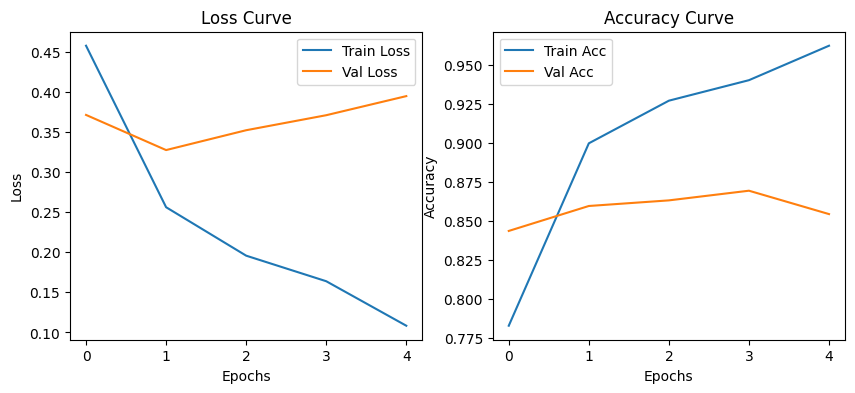

782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.8537 - loss: 0.4161

Test Accuracy: 0.8541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

Sample Predictions:

Review # 0
Actual: 0 | Predicted: 0
-----------------------------
Review # 1
Actual: 1 | Predicted: 1
-----------------------------
Review # 2
Actual: 1 | Predicted: 0
-----------------------------
Review # 3
Actual: 0 | Predicted: 0
-----------------------------
Review # 4
Actual: 1 | Predicted: 1
-----------------------------


/tmp/ipython-input-1527634882.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual:", y_test[i], "| Predicted:", int(pred[i]))


In [ ]:
# IMDB Sentiment Classification using LSTM (Simple Code)

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 1. Load IMDB dataset
num_words = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)

# 2. Pad sequences (make equal length)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

# 3. Build LSTM Model
model = keras.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, maxlen))
model.summary()

# 4. Train Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

# 5. Plot Accuracy & Loss
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.show()

# 6. Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 7. Predict and display sample results
pred = (model.predict(X_test[:5]) > 0.5).astype(int)

print("\nSample Predictions:\n")
for i in range(5):
    print("Review #", i)
    print("Actual:", y_test[i], "| Predicted:", int(pred[i]))
    print("-----------------------------")
